In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:20.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-9.5e19,-1.42e20,-1.6e20,-2.3e20]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.4,0.6,0.7,0.8]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=9.0-1.5*x*x
    Dv=4.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandX3,bandX3,bandX3],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2

xmax=3.0

3.0

In [3]:
TsA=Array{Float64}(length(LMg2SiSn04TE),length(xs)) 
TsA[:,1]=LMg2SiSn04TE
TsA[:,2]=LMg2SiSn06TE
TsA[:,3]=LMg2SiSn07TE
TsA[:,4]=LMg2SiSn08TE

26-element Array{Float64,1}:
 300.0
 319.4
 338.8
 359.5
 380.2
 399.6
 420.3
 438.4
 460.3
 481.0
 500.4
 519.8
 540.5
 561.2
 580.6
 601.3
 620.7
 640.1
 660.8
 680.2
 702.2
 720.3
 739.7
 760.3
 781.0
 800.4

In [4]:
Ts

31-element Array{Float64,1}:
 300.0
 320.0
 340.0
 360.0
 380.0
 400.0
 420.0
 440.0
 460.0
 480.0
 500.0
 520.0
 540.0
   ⋮  
 680.0
 700.0
 720.0
 740.0
 760.0
 780.0
 800.0
 820.0
 840.0
 860.0
 880.0
 900.0

In [5]:
#sigmasA=100*[,LMg2SiSn04E[5],LMg2SiSn04E[10]]

In [6]:
sigmasA=Array{Float64}(length(TsA[:,1]),length(xs)) 
for (iT,Txx) in enumerate(TsA[:,1])
    #for (iN,Nxx) enumerate(numofn)
       sigmasA[iT,1]= 100*LMg2SiSn04E[iT]
    sigmasA[iT,2]= 100*LMg2SiSn06E[iT]
    sigmasA[iT,3]= 100*LMg2SiSn07E[iT]
    sigmasA[iT,4]= 100*LMg2SiSn08E[iT]
    
    #end    
end

#sigmasA[1,1,1]=100*LMg2SiSn04E[1]
#sigmasA[2,1,1]=100*LMg2SiSn04E[2]
#sigmasA[3,1,1]=100*LMg2SiSn04E[3]
sigmasA

26×4 Array{Float64,2}:
 138600.0  158700.0  174100.0  209700.0
 133100.0  152600.0  165600.0  204900.0
 129300.0  148800.0  159100.0  195000.0
 124500.0  144000.0  152600.0  188900.0
 119000.0  138900.0  145400.0  182000.0
 115300.0  133800.0  139600.0  173100.0
 111500.0  128300.0  134800.0  165200.0
 107400.0  124200.0  129700.0  157400.0
 103000.0  118700.0  124200.0  149800.0
  98860.0  113900.0  119700.0  142300.0
  94070.0  110500.0  113600.0  137200.0
  90650.0  107100.0  110800.0  131000.0
  87220.0  103000.0  106700.0  126200.0
  84490.0  100200.0  101300.0  121800.0
  82780.0   96120.0   98520.0  115600.0
  79700.0   93380.0   95440.0  111500.0
  76270.0   89280.0   90990.0  106000.0
  73880.0   86540.0   88590.0  101300.0
  71140.0   84140.0   84140.0   98170.0
  69090.0   81410.0   82090.0   93730.0
  67380.0   79010.0   80380.0   89960.0
  64980.0   76270.0   77640.0   87220.0
  63610.0   73540.0   74900.0   83460.0
  62240.0   70800.0   73190.0   80720.0
  59850.0   68060

In [7]:
#@time (sigmaS,numofnS)=fitsigmas(bndstTx,xs,TsA,numofn,numofnn,tauTOTTx,xmax,sigmasA)
#x=3.0

In [8]:
#(numofn2,Efs2,sigmas2,seebecks2,kes2,kees2,kehs2,kbis2,sigmaes2,sigmahs2,seebeckes2,seebeckhs2)=electronicPropsisoVarn(bndstTx,xs,Ts,TsA,numofnS,numofnn,tauTOTTx,xmax)
                               #bndstTx,xs,TsA,numofn,numofnn,tauTOTTx,xmax,sigmasA
#x=3.0

In [9]:
@time (numofn3,Efs3,sigmas3,seebecks3,kes3,kees3,kehs3,kbis3,sigmaes3,sigmahs3,seebeckes3,seebeckhs3)=electronicPropsisoVarAll(bndstTx,xs,Ts,TsA,sigmasA,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 60.912543 seconds (406.87 M allocations: 52.752 GiB, 6.92% gc time)


In [10]:
#@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
#x=3.0

In [11]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
foreach(i->println(i,", ",Efsr[i]),1:length(Efsr))

LoadError: [91mUndefVarError: Efs not defined[39m

In [12]:
foreach(i->println(i," ",numofn2[i,1]," ",numofn3[i,1]),1:length(numofn2))

LoadError: [91mUndefVarError: numofn2 not defined[39m

In [13]:
sigmaes

LoadError: [91mUndefVarError: sigmaes not defined[39m

In [14]:
sigmahs

LoadError: [91mUndefVarError: sigmahs not defined[39m

In [15]:
foreach(i->println(i," ",sigmas[i,1,1]),1:length(sigmas))

LoadError: [91mUndefVarError: sigmas not defined[39m

In [16]:
foreach(i->println(i," ",sigmaS[i,1,1]),1:length(sigmaS))

LoadError: [91mUndefVarError: sigmaS not defined[39m

In [17]:
foreach(i->println(i," ",sigmas2[i,1,1]),1:length(sigmas2))

LoadError: [91mUndefVarError: sigmas2 not defined[39m

In [18]:
foreach(i->println(i," ",sigmas3[i,1,1]),1:length(sigmas3[:,1,1]))

1 134611.86864765477
2 129247.12929636058
3 125342.04567581776
4 120858.01147148368
5 115822.13319512557
6 111901.93815634519
7 108519.96819351886
8 104490.56788126797
9 100428.2420533052
10 96377.76257267133
11 92030.06682733563
12 88636.93104064176
13 85454.44934738263
14 82714.6224052962
15 81003.39601794403
16 78012.04644244471
17 74862.99751793042
18 72441.98511342693
19 69888.192979146
20 67790.3169735255
21 66109.91313061072
22 63749.68287710703
23 62269.216581763554
24 60865.86450823953
25 58507.076870050565
26 56821.80558593133
27 55496.52814130775
28 54306.35159041195
29 53257.48510748729
30 52354.15659755682
31 51616.662817124365


In [19]:
foreach(i->println(i," ",seebeckes[i,1,1]),1:length(seebeckes))

LoadError: [91mUndefVarError: seebeckes not defined[39m

In [20]:
foreach(i->println(i,"   ",seebeckhs[i,1,1]),1:length(seebeckhs))

LoadError: [91mUndefVarError: seebeckhs not defined[39m

In [21]:
kes

LoadError: [91mUndefVarError: kes not defined[39m

In [22]:
foreach(i->println(i,"   ",kbis[i,1,1]),1:length(kbis))

LoadError: [91mUndefVarError: kbis not defined[39m

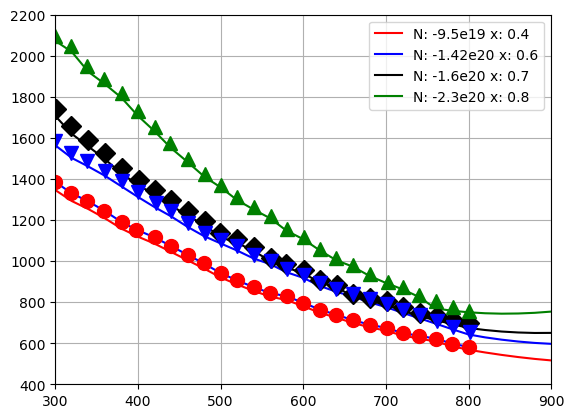

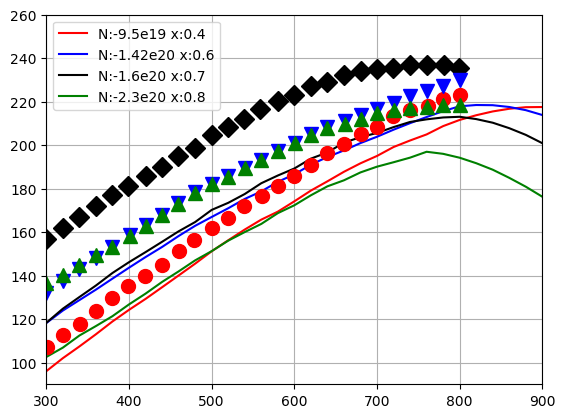

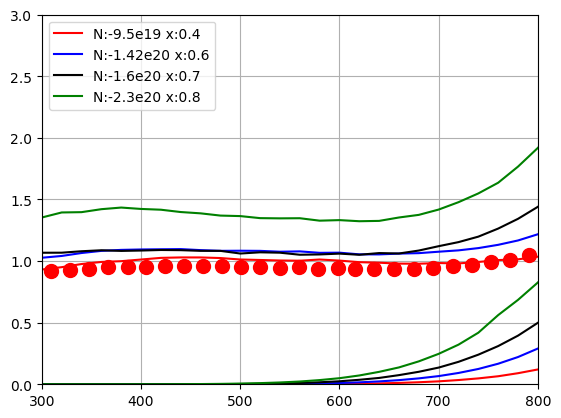

In [23]:
colors=["r","b","k","g","m","y","c"]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)                
       # plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
       # ,label=string("N: $(numofn[p]) x: $(xs[q])"))
    #plot(Ts,sigmas2/100,linestyle="-.",color=colors[mod(k,length(colors))]
      #  ,label=string("N: $(numofn[p]) x: $(xs[q])"))
     plot(Ts,sigmas3[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        k+=1
        #push!(plots,p)       
   # end
end
plot(LMg2SiSn04TE,sigmasA[:,1,1]/100, linestyle="-",color="b")
#plot(Ts,sigmas2/100, linestyle="-",color="k")
plot(LMg2SiSn04TE,LMg2SiSn04E, linestyle="None",marker="o",markersize=10,color="r")
plot(LMg2SiSn07TE,LMg2SiSn07E, linestyle="None",marker="D",markersize=10,color="k")
plot(LMg2SiSn06TE,LMg2SiSn06E, linestyle="None",marker="v",markersize=10,color="b")
plot(LMg2SiSn08TE,LMg2SiSn08E, linestyle="None",marker="^",markersize=10,color="g")
ylim(400,2200)
xlim(300,900)
legend()
grid()
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)
   #  #   plot(Ts,-1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
   #     ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
     #plot(Ts,-1e6*seebecks2,linestyle="-.",color=colors[mod(k,length(colors))]
     #   ,label=string("N:$(numofn[p]) x:$(xs[q])"))
    plot(Ts,-1e6*seebecks3[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    #end
end
#plot(Ts,-1e6*seebecks2, linestyle="-.",color="k")
plot(LMg2SiSn04TS,LMg2SiSn04S, linestyle="None",marker="o",markersize=10,color="r")
plot(LMg2SiSn07TS,LMg2SiSn07S, linestyle="None",marker="D",markersize=10,color="k")
plot(LMg2SiSn06TS,LMg2SiSn06S, linestyle="None",marker="v",markersize=10,color="b")
plot(LMg2SiSn08TS,LMg2SiSn08S, linestyle="None",marker="^",markersize=10,color="g")
ylim(90,260)
xlim(300,900)
legend(loc="upper left")
grid()
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)
      #  plot(Ts,kes[:,p,q]+kbis[:,p,q],color=colors[mod(k,length(colors))]
     #   ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
    #plot(Ts,kbis[:,p,q],color=colors[mod(k,length(colors))]) 
    #  plot(Ts,kes2+kbis2,linestyle="-.",color=colors[mod(k,length(colors))]
    #    ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
   # plot(Ts,kbis2,linestyle="-.",color=colors[mod(k,length(colors))]) 
   plot(Ts,kes3[:,p,q]+kbis3[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
    plot(Ts,kbis3[:,p,q],color=colors[mod(k,length(colors))]) 
        k+=1
    #end
end
plot(LMg2SiSn04TKe,LMg2SiSn04Ke, linestyle="None",marker="o",markersize=10,color="r")
#plot(LMg2SiSn07TKe,LMg2SiSn07Ke, linestyle="None",marker=".",markersize=10,color="k")
#plot(LMg2SiSn06TKe,LMg2SiSn06Ke, linestyle="None",marker=".",markersize=10,color="b")
#plot(LMg2SiSn08TKe,LMg2SiSn08Ke, linestyle="None",marker=".",markersize=10,color="r")
ylim(0.0,3.0)
xlim(300,800)
legend(loc="upper left")
grid()